# People Metrics & Retention Insights

(Using synthetic data)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Seaborn Plotting theme
sns.set_theme(style='whitegrid')

print("Libraries imported successfully.")

Libraries imported successfully.


## Importing Dataset

In [2]:
df = pd.read_csv("data/employee_metrics.csv")

print("Dataset imported successfully.")

Dataset imported successfully.


## Viewing the Dataset

In [3]:
df.head()

,EmployeeID,JoinDate,LastPromotionDate,Age,Gender,Department,Location,JobLevel,EngagementScore,PerformanceScore,ManagerSatisfaction,NumTrainingsCompleted,TenureYears,LeftCompany,AttritionReason
0,1,2020-06-15,2021-06-15,32,Male,HR,Berlin,4,4.276240,3.818902,3.834850,4,4,0,NaN
1,2,2015-05-11,2024-05-08,50,Male,Sales,Berlin,4,8.521031,2.919122,2.869796,8,9,1,Retired
2,3,2016-06-01,2024-05-30,28,Male,Product,Berlin,1,6.983925,1.586720,1.430099,10,8,0,NaN
3,4,2012-09-19,2013-09-19,50,Other,Product,Berlin,4,5.375425,3.071954,2.609112,1,12,0,NaN
4,5,2019-06-16,2019-06-16,33,Male,Marketing,Dubai,3,9.431298,3.274224,3.581034,4,5,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmployeeID             5000 non-null   int64  
 1   JoinDate               5000 non-null   object 
 2   LastPromotionDate      5000 non-null   object 
 3   Age                    5000 non-null   int64  
 4   Gender                 5000 non-null   object 
 5   Department             5000 non-null   object 
 6   Location               5000 non-null   object 
 7   JobLevel               5000 non-null   int64  
 8   EngagementScore        5000 non-null   float64
 9   PerformanceScore       5000 non-null   float64
 10  ManagerSatisfaction    5000 non-null   float64
 11  NumTrainingsCompleted  5000 non-null   int64  
 12  TenureYears            5000 non-null   int64  
 13  LeftCompany            5000 non-null   int64  
 14  AttritionReason        1502 non-null   object 
dtypes: f

In [5]:
df.describe()

,EmployeeID,Age,JobLevel,EngagementScore,PerformanceScore,ManagerSatisfaction,NumTrainingsCompleted,TenureYears,LeftCompany
count,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,38.5792,3.006000,6.472303,3.492530,3.463982,4.986400,7.253200,0.300400
std,1443.520003,9.6542,1.414908,1.961729,0.940692,1.058885,3.166231,3.209914,0.458478
min,1.000000,22.0000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000
25%,1250.750000,30.0000,2.000000,5.144574,2.853289,2.716705,2.000000,4.000000,0.000000
50%,2500.500000,39.0000,3.000000,6.518082,3.519815,3.522048,5.000000,7.000000,0.000000
75%,3750.250000,47.0000,4.000000,7.892489,4.192822,4.319385,8.000000,10.000000,1.000000
max,5000.000000,55.0000,5.000000,10.000000,5.000000,5.000000,10.000000,13.000000,1.000000


## Transformation

In [6]:
# Changing Dates to datetime format
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df['LastPromotionDate'] = pd.to_datetime(df['LastPromotionDate'])

print('Datetime formatted.')

Datetime formatted.


In [7]:
# Calculating years since promotion for analysis
df["YearsSincePromotion"] = ((pd.to_datetime("2025-04-01") - df["LastPromotionDate"]).dt.days // 365) # Calculating how many years since promotion from 2025-04-01

df.head()

,EmployeeID,JoinDate,LastPromotionDate,Age,Gender,Department,Location,JobLevel,EngagementScore,PerformanceScore,ManagerSatisfaction,NumTrainingsCompleted,TenureYears,LeftCompany,AttritionReason,YearsSincePromotion
0,1,2020-06-15,2021-06-15,32,Male,HR,Berlin,4,4.276240,3.818902,3.834850,4,4,0,NaN,3
1,2,2015-05-11,2024-05-08,50,Male,Sales,Berlin,4,8.521031,2.919122,2.869796,8,9,1,Retired,0
2,3,2016-06-01,2024-05-30,28,Male,Product,Berlin,1,6.983925,1.586720,1.430099,10,8,0,NaN,0
3,4,2012-09-19,2013-09-19,50,Other,Product,Berlin,4,5.375425,3.071954,2.609112,1,12,0,NaN,11
4,5,2019-06-16,2019-06-16,33,Male,Marketing,Dubai,3,9.431298,3.274224,3.581034,4,5,0,NaN,5


## Analysis
### Promotion vs Retention Analysis

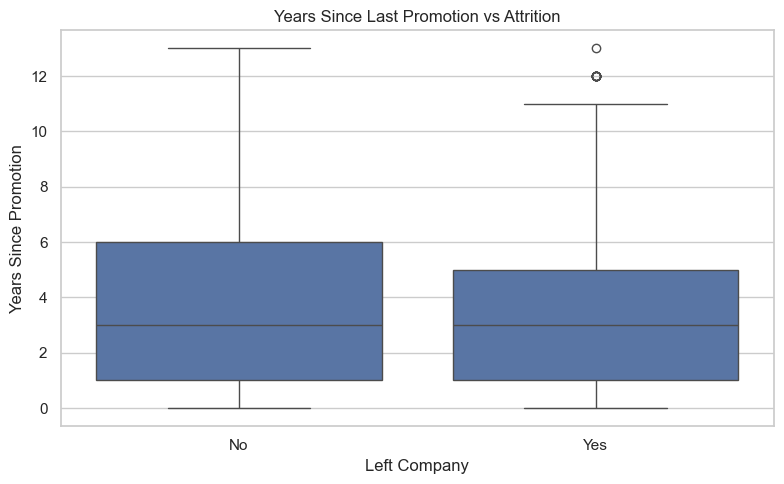

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="LeftCompany", y="YearsSincePromotion", data=df)
plt.title("Years Since Last Promotion vs Attrition")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.xlabel("Left Company")
plt.ylabel("Years Since Promotion")
plt.tight_layout()
plt.show()

> The similar distributions suggest that time since last promotion isn't a strong differentiator between employees who stay versus those who leave.

> However, the presence of outliers specifically in the "Yes" group indicates that employees who haven't been promoted for exceptionally long periods (12+ years) may eventually choose to leave the company.


## Engagement vs Attrition

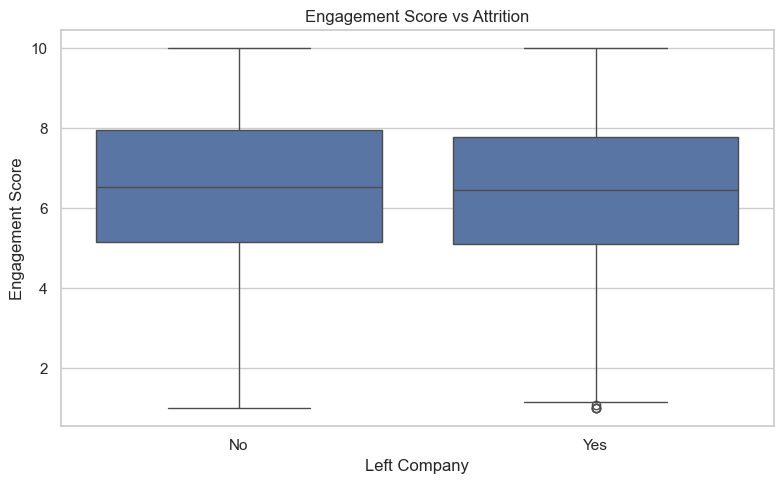

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="LeftCompany", y="EngagementScore", data=df)
plt.title("Engagement Score vs Attrition")
plt.xlabel("Left Company")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.ylabel("Engagement Score")
plt.tight_layout()
plt.show()

>Surprisingly, engagement scores appear to be almost identical between employees who left and those who stayed, suggesting that employee attrition at this company may be driven by factors other than engagement levels.

> This challenges the common assumption that disengaged employees are more likely to leave, indicating management should look beyond engagement metrics to understand and address turnover issues.

## Attrition Rate by Department

In [10]:
dep_attrition = df.groupby("Department")["LeftCompany"].mean().sort_values(ascending=False)

dep_attrition.head()

Department
HR             0.315377
Product        0.311245
Engineering    0.309524
Marketing      0.306101
Sales          0.259921
Name: LeftCompany, dtype: float64

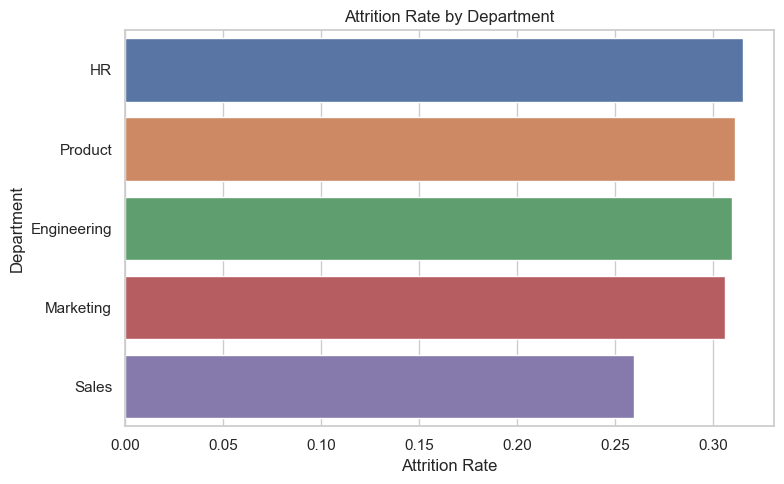

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x=dep_attrition, y=dep_attrition.index, hue=dep_attrition.index)
plt.title("Attrition Rate by Department")
plt.xlabel("Attrition Rate")
plt.tight_layout()
plt.show()

> The technical and administrative departments (HR, Product, and Engineering) are experiencing significantly higher turnover than Sales. 

>With attrition rates approaching or exceeding 30% in four out of five departments, the company is facing a substantial retention problem across most of the organization. 

>The notably lower turnover in Sales suggests this department may have more effective retention strategies or compensation structures that could potentially be applied elsewhere in the company to address the widespread retention challenges.

## Prediction Modeling
### Logistic Regression Model

In [12]:
# Select Features
features = ["EngagementScore", "PerformanceScore", "YearsSincePromotion", "TenureYears", "ManagerSatisfaction"]

# Assign X and y
X = df[features]
y = df["LeftCompany"]

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train Model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

### Prediction

In [15]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58       685
           1       0.33      0.53      0.41       315

    accuracy                           0.51      1000
   macro avg       0.51      0.52      0.50      1000
weighted avg       0.58      0.51      0.53      1000



## Project Insights and Recommendations

### Key Recommendations

1. **Address Long-Term Promotion Stagnation**
   - Target employees with 8+ years since last promotion as they represent significant attrition risk, despite overall promotion timing not being a strong predictor.
   - Implement career pathing reviews for employees approaching 5 years without advancement.

2. **Look Beyond Traditional Engagement Metrics**
   - Engagement scores show minimal correlation with attrition decisions, suggesting deeper factors at play.
   - Conduct targeted exit interviews to identify true retention drivers beyond standard engagement surveys.

3. **Department-Specific Retention Strategies**
   - Prioritize HR department (32% attrition) for immediate intervention.
   - Implement tailored retention programs for Product and Engineering departments (30%+ attrition).
   - Study Sales practices (25% attrition) to identify transferable retention success factors.

4. **Comprehensive Retention Framework**
   - Develop a holistic approach combining targeted promotions, growth opportunities, and department-specific initiatives.
   - Establish quarterly retention risk assessments focusing on employees with multiple risk factors.